In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.feature_selection import RFECV

In [2]:
df = pd.read_csv('non_rolling_mean_win_percentage.csv')
df

,Unnamed: 0,game_id,Date,Team,Opponent,club_id,opponent_id,own_manager_name,opponent_manager_name,Referee,...,Blocks,Interceptions,Error,market_value_in_eur,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
0,10,3050172,2018-08-10,Manchester Utd,Leicester City,985,1003,José Mourinho,Claude Puel,A Marriner,...,15,17,0,4.071429e+07,313,180,57.507987,9,5,55.555556
1,11,3050172,2018-08-10,Leicester City,Manchester Utd,1003,985,Claude Puel,José Mourinho,A Marriner,...,8,12,0,1.478571e+07,181,71,39.226519,9,1,11.111111
2,2,3050168,2018-08-11,Cardiff City,Bournemouth,603,989,Neil Warnock,Eddie Howe,K Friend,...,16,15,0,2.196429e+06,49,11,22.448980,0,0,0.000000
3,3,3050168,2018-08-11,Bournemouth,Cardiff City,989,603,Eddie Howe,Neil Warnock,K Friend,...,11,4,0,6.035714e+06,128,40,31.250000,0,0,0.000000
4,5,3050169,2018-08-11,Crystal Palace,Fulham,873,931,Roy Hodgson,Slavisa Jokanovic,M Dean,...,8,14,0,1.117857e+07,207,69,33.333333,2,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,4361,4095365,2024-03-16,Fulham,Tottenham,931,148,Marco Silva,Ange Postecoglou,R Jones,...,15,13,0,1.681250e+07,247,68,27.530364,12,1,8.333333
4362,4363,4095366,2024-03-16,Nottingham Forest,Luton Town,703,1031,Nuno Espírito Santo,Rob Edwards,D England,...,14,7,0,1.485714e+07,90,27,30.000000,1,0,0.000000
4363,4362,4095366,2024-03-16,Luton Town,Nottingham Forest,1031,703,Rob Edwards,Nuno Espírito Santo,D England,...,15,5,0,5.200000e+06,62,22,35.483871,1,0,0.000000
4364,4365,4095368,2024-03-17,West Ham,Aston Villa,379,405,David Moyes,Unai Emery,J Gillett,...,17,8,0,2.563571e+07,501,183,36.526946,17,8,47.058824


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4366 entries, 0 to 4365
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4366 non-null   int64  
 1   game_id                     4366 non-null   int64  
 2   Date                        4366 non-null   object 
 3   Team                        4366 non-null   object 
 4   Opponent                    4366 non-null   object 
 5   club_id                     4366 non-null   int64  
 6   opponent_id                 4366 non-null   int64  
 7   own_manager_name            4366 non-null   object 
 8   opponent_manager_name       4366 non-null   object 
 9   Referee                     4366 non-null   object 
 10  TY                          4366 non-null   int64  
 11  OY                          4366 non-null   int64  
 12  TR                          4366 non-null   int64  
 13  OR                          4366 

In [4]:
df.columns

Index(['Unnamed: 0', 'game_id', 'Date', 'Team', 'Opponent', 'club_id',
       'opponent_id', 'own_manager_name', 'opponent_manager_name', 'Referee',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D', 'B365OW', 'Table', 'Venue',
       'Result', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA', 'Oppo. Table',
       'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent'],
      dtype='object')

# 인코딩

In [5]:
label_encoder = LabelEncoder()

df['le_Venue'] = label_encoder.fit_transform(df['Venue'])
df['le_Venue']
# Home은 1, Away는 0

0       1
1       0
2       0
3       1
4       0
       ..
4361    1
4362    0
4363    1
4364    1
4365    0
Name: le_Venue, Length: 4366, dtype: int64

In [6]:
df['le_Result'] = label_encoder.fit_transform(df['Result'])
df['le_Result']
# lose : 1, win : 2, draw : 0

0       2
1       1
2       1
3       2
4       2
       ..
4361    2
4362    0
4363    0
4364    0
4365    0
Name: le_Result, Length: 4366, dtype: int64

In [7]:
df['le_Referee'] = label_encoder.fit_transform(df['Referee'])
df['le_Referee']

0        1
1        1
2       15
3       15
4       20
        ..
4361    27
4362     9
4363     9
4364    12
4365    12
Name: le_Referee, Length: 4366, dtype: int64

In [8]:
new_column_order = ['club_id', 'opponent_id', 'own_manager_name', 'opponent_manager_name',
       'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Venue', 'Result', 'Possesion', 'Aerial Duels(%)',
       'GF', 'GA', 'Oppo. Table', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals',
       'Expected Assists', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error','market_value_in_eur',
        'total_games','wins',
        'win_percentage','total_games_vs_opponent',
        'wins_vs_opponent',
        'win_percentage_vs_opponent',
        'le_Venue','le_Result','le_Referee']

In [9]:
df = df[new_column_order]
df

,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,OR,B365TW,B365D,...,market_value_in_eur,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee
0,985,1003,José Mourinho,Claude Puel,2,1,0,0,63.694268,25.641026,...,4.071429e+07,313,180,57.507987,9,5,55.555556,1,2,1
1,1003,985,Claude Puel,José Mourinho,1,2,0,0,13.333333,25.641026,...,1.478571e+07,181,71,39.226519,9,1,11.111111,0,1,1
2,603,989,Neil Warnock,Eddie Howe,1,1,0,0,22.222222,27.777778,...,2.196429e+06,49,11,22.448980,0,0,0.000000,0,1,15
3,989,603,Eddie Howe,Neil Warnock,1,1,0,0,52.631579,27.777778,...,6.035714e+06,128,40,31.250000,0,0,0.000000,1,2,15
4,873,931,Roy Hodgson,Slavisa Jokanovic,2,1,0,0,33.333333,29.411765,...,1.117857e+07,207,69,33.333333,2,0,0.000000,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,931,148,Marco Silva,Ange Postecoglou,2,3,0,0,28.571429,26.315789,...,1.681250e+07,247,68,27.530364,12,1,8.333333,1,2,27
4362,703,1031,Nuno Espírito Santo,Rob Edwards,2,1,0,0,40.816327,28.571429,...,1.485714e+07,90,27,30.000000,1,0,0.000000,0,0,9
4363,1031,703,Rob Edwards,Nuno Espírito Santo,1,2,0,0,35.714286,28.571429,...,5.200000e+06,62,22,35.483871,1,0,0.000000,1,0,9
4364,379,405,David Moyes,Unai Emery,3,3,0,0,38.022814,26.666667,...,2.563571e+07,501,183,36.526946,17,8,47.058824,1,0,12


In [10]:
# 라벨 인코더 객체 생성
label_encoder = LabelEncoder()

# 라벨 인코딩 적용
df['le_own_manager_name'] = label_encoder.fit_transform(df['own_manager_name'])

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_80503/1181552020.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['le_own_manager_name'] = label_encoder.fit_transform(df['own_manager_name'])


In [11]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
label_mapping

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [12]:
# 라벨 인코더 객체 생성
label_encoder2 = LabelEncoder()

# 라벨 인코딩 적용
df['le_opponent_manager_name'] = label_encoder2.fit_transform(df['opponent_manager_name'])

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_80503/2811947186.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['le_opponent_manager_name'] = label_encoder2.fit_transform(df['opponent_manager_name'])


In [13]:
label_mapping2 = dict(zip(label_encoder2.classes_, range(len(label_encoder2.classes_))))
label_mapping2

{'Aaron Danks': 0,
 'Adam Sadler': 1,
 'Albert Stuivenberg': 2,
 'Andoni Iraola': 3,
 'Ange Postecoglou': 4,
 'Antonio Conte': 5,
 'Björn Hamberg': 6,
 'Brendan Rodgers': 7,
 'Bruno Lage': 8,
 'Bruno Saltor': 9,
 'Carlo Ancelotti': 10,
 'Chris Hughton': 11,
 'Chris Wilder': 12,
 'Claude Puel': 13,
 'Claudio Ranieri': 14,
 'Cristian Stellini': 15,
 'Daniel Farke': 16,
 'David Moyes': 17,
 'David Wagner': 18,
 'Dean Smith': 19,
 'Duncan Ferguson': 20,
 'Eddie Howe': 21,
 'Erik ten Hag': 22,
 'Frank Lampard': 23,
 'Freddie Ljungberg': 24,
 "Gary O'Neil": 25,
 'Graeme Jones': 26,
 'Graham Potter': 27,
 'Hayden Mullins': 28,
 'Ian Woan': 29,
 'Jan Siewert': 30,
 'Jason Tindall': 31,
 'Javi Gracia': 32,
 'Jesse Marsch': 33,
 'José Mourinho': 34,
 'Julen Lopetegui': 35,
 'Jürgen Klopp': 36,
 'Kelvin Davis': 37,
 'Manuel Pellegrini': 38,
 'Marcelo Bielsa': 39,
 'Marco Silva': 40,
 'Mark Hudson': 41,
 'Mark Hughes': 42,
 'Mauricio Pochettino': 43,
 'Maurizio Sarri': 44,
 'Michael Carrick': 45,


In [14]:
df = df.sort_values(['club_id'])
df

,club_id,opponent_id,own_manager_name,opponent_manager_name,TY,OY,TR,OR,B365TW,B365D,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
3466,11,1148,Mikel Arteta,Thomas Frank,0,2,0,0,69.444444,21.052632,...,318,57.608696,3,2,66.666667,1,0,24,49,80
1422,11,1003,Mikel Arteta,Brendan Rodgers,1,0,1,0,43.478261,28.571429,...,228,58.611825,10,6,60.000000,1,0,4,49,7
898,11,985,Unai Emery,Ole Gunnar Solskjaer,2,4,0,0,34.482759,28.571429,...,220,58.981233,16,4,25.000000,0,0,15,82,54
4060,11,543,Mikel Arteta,Gary O'Neil,1,2,0,0,80.000000,18.181818,...,335,57.758621,10,5,50.000000,1,2,24,49,25
3010,11,762,Mikel Arteta,Eddie Howe,3,0,0,0,54.644809,27.777778,...,291,57.058824,18,17,94.444444,0,1,9,49,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,1237,989,Roberto De Zerbi,Andoni Iraola,3,3,0,0,73.529412,19.047619,...,91,33.955224,9,4,44.444444,1,2,11,67,3
2643,1237,631,Graham Potter,Thomas Tuchel,1,4,0,0,13.333333,22.222222,...,58,28.019324,9,0,0.000000,0,0,20,27,81
1171,1237,631,Graham Potter,Frank Lampard,2,3,0,0,27.777778,27.777778,...,34,29.310345,4,0,0.000000,1,0,31,27,23
283,1237,873,Chris Hughton,Roy Hodgson,2,3,1,0,33.333333,32.258065,...,22,32.835821,3,1,33.333333,1,2,15,11,68


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4366 entries, 3466 to 3105
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   club_id                     4366 non-null   int64  
 1   opponent_id                 4366 non-null   int64  
 2   own_manager_name            4366 non-null   object 
 3   opponent_manager_name       4366 non-null   object 
 4   TY                          4366 non-null   int64  
 5   OY                          4366 non-null   int64  
 6   TR                          4366 non-null   int64  
 7   OR                          4366 non-null   int64  
 8   B365TW                      4366 non-null   float64
 9   B365D                       4366 non-null   float64
 10  B365OW                      4366 non-null   float64
 11  Table                       4366 non-null   int64  
 12  Venue                       4366 non-null   object 
 13  Result                      4366 no

In [16]:
# 이미 라벨링을 진행해서 모델링에 필요하지 않은 컬럼들 제거하기
modeling = df.drop(['own_manager_name','opponent_manager_name','Venue','Result'],axis=1)
modeling

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
3466,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.608696,3,2,66.666667,1,0,24,49,80
1422,11,1003,1,0,1,0,43.478261,28.571429,33.333333,8,...,228,58.611825,10,6,60.000000,1,0,4,49,7
898,11,985,2,4,0,0,34.482759,28.571429,42.194093,4,...,220,58.981233,16,4,25.000000,0,0,15,82,54
4060,11,543,1,2,0,0,80.000000,18.181818,8.333333,1,...,335,57.758621,10,5,50.000000,1,2,24,49,25
3010,11,762,3,0,0,0,54.644809,27.777778,23.094688,5,...,291,57.058824,18,17,94.444444,0,1,9,49,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,1237,989,3,3,0,0,73.529412,19.047619,13.333333,3,...,91,33.955224,9,4,44.444444,1,2,11,67,3
2643,1237,631,1,4,0,0,13.333333,22.222222,71.428571,10,...,58,28.019324,9,0,0.000000,0,0,20,27,81
1171,1237,631,2,3,0,0,27.777778,27.777778,51.282051,14,...,34,29.310345,4,0,0.000000,1,0,31,27,23
283,1237,873,2,3,1,0,33.333333,32.258065,37.037037,10,...,22,32.835821,3,1,33.333333,1,2,15,11,68


In [17]:
modeling.columns

Index(['club_id', 'opponent_id', 'TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent', 'le_Venue', 'le_Result', 'le_Referee',
       'le_own_manager_name', 'le_opponent_manager_name'],
      dtype='object')

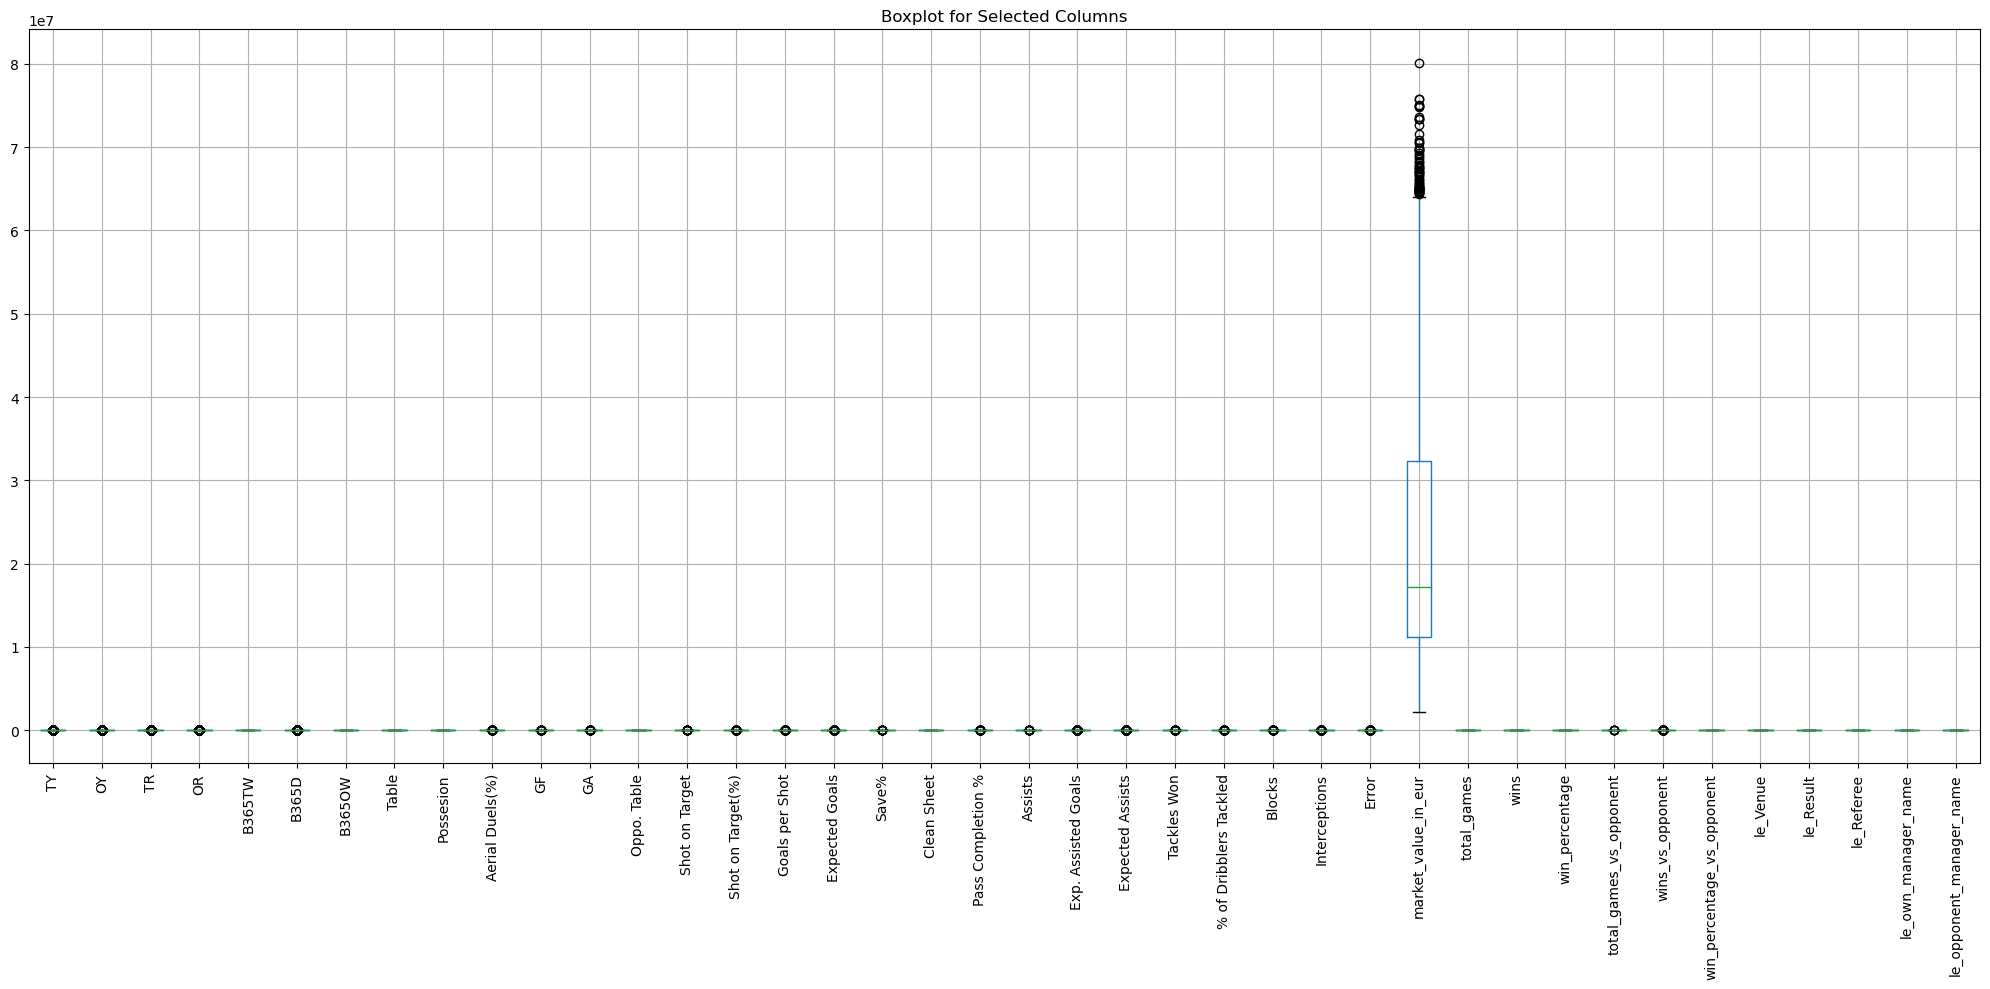

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = modeling


columns_to_check = ['TY', 'OY', 'TR', 'OR', 'B365TW', 'B365D',
       'B365OW', 'Table', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
       'Oppo. Table', 'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
       'Assists', 'Exp. Assisted Goals', 'Expected Assists', 'Tackles Won',
       '% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error',
       'market_value_in_eur', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent', 'le_Venue', 'le_Result', 'le_Referee',
       'le_own_manager_name', 'le_opponent_manager_name']

plt.figure(figsize=(20, 10))  # 그림의 크기 조절
data[columns_to_check].boxplot(rot=90)  # 이상치 확인을 원하는 컬럼에 대한 상자그림 그리기
plt.title('Boxplot for Selected Columns')  # 그래프 제목 설정
plt.tight_layout()  # 레이아웃 조정하여 레이블이 잘 보이게 함
plt.show()

In [19]:
# 이상치를 제거할 데이터프레임 생성
data_no_outliers = data.copy()

# 각 열에 대해 Z-score를 계산하여 이상치 제거
for column in columns_to_check:
    # Z-score 계산
    z_scores = (data_no_outliers[column] - data_no_outliers[column].mean()) / data_no_outliers[column].std()
    # Z-score가 3을 넘는 행 제거 (임의의 임계값)
    data_no_outliers = data_no_outliers[(np.abs(z_scores) <= 3)]

# 이상치가 제거된 데이터프레임 출력
data_no_outliers

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
3466,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.608696,3,2,66.666667,1,0,24,49,80
898,11,985,2,4,0,0,34.482759,28.571429,42.194093,4,...,220,58.981233,16,4,25.000000,0,0,15,82,54
4060,11,543,1,2,0,0,80.000000,18.181818,8.333333,1,...,335,57.758621,10,5,50.000000,1,2,24,49,25
1406,11,543,4,2,0,0,30.769231,29.411765,44.444444,7,...,228,58.461538,2,0,0.000000,0,2,21,49,53
2340,11,1123,1,2,0,0,66.666667,21.739130,16.666667,16,...,276,56.557377,8,5,62.500000,1,2,21,49,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1237,29,1,2,0,0,25.000000,26.315789,54.054054,14,...,34,29.565217,4,1,25.000000,0,1,8,27,10
2621,1237,1148,1,3,0,0,52.631579,29.411765,23.809524,9,...,55,27.363184,2,2,100.000000,1,2,9,27,80
2643,1237,631,1,4,0,0,13.333333,22.222222,71.428571,10,...,58,28.019324,9,0,0.000000,0,0,20,27,81
1171,1237,631,2,3,0,0,27.777778,27.777778,51.282051,14,...,34,29.310345,4,0,0.000000,1,0,31,27,23


# 표준화

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
data = data_no_outliers

# Date 컬럼 제거 (표준화에 영향을 미치지 않는 컬럼)
data = data.drop(columns=['club_id','opponent_id'])

# 표준화를 위해 StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터프레임에서 숫자형 컬럼들만 선택하여 표준화 수행
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
numeric_columns = numeric_columns.drop('le_Result')  # le_Result 제외
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# 결과 출력
print(data)

            TY        OY   TR   OR    B365TW     B365D    B365OW     Table  \
3466 -1.375710  0.251584  0.0  0.0  1.534956 -0.866234 -1.297626 -1.762231   
898   0.236791  1.867353  0.0  0.0 -0.203467  0.622376  0.061179 -1.227134   
4060 -0.569460  0.251584  0.0  0.0  2.059817 -1.434613 -1.587436 -1.762231   
1406  1.849291  0.251584  0.0  0.0 -0.388117  0.788750  0.170745 -0.692037   
2340 -0.569460  0.251584  0.0  0.0  1.396835 -0.730318 -1.181702  0.913253   
...        ...       ...  ...  ...       ...       ...       ...       ...   
1193 -0.569460  0.251584  0.0  0.0 -0.674984  0.175793  0.638618  0.556522   
2621 -0.569460  1.059468  0.0  0.0  0.698959  0.788750 -0.833930 -0.335306   
2643 -0.569460  1.867353  0.0  0.0 -1.255094 -0.634673  1.484550 -0.156940   
1171  0.236791  1.059468  0.0  0.0 -0.536863  0.465245  0.503655  0.556522   
3105  0.236791  1.059468  0.0  0.0  0.698959  0.175793 -0.711905 -1.227134   

      Possesion  Aerial Duels(%)  ...      wins  win_percentage

In [21]:
data['Exp. Assisted Goals_log_scaled'] = np.log1p(data['Exp. Assisted Goals'])
data['Expected Assists_log_scaled'] = np.log1p(data['Expected Assists'])
data['market_value_in_eur_log_scaled'] = np.log1p(data['market_value_in_eur'])

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
modeling

,club_id,opponent_id,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,...,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name
3466,11,1148,0,2,0,0,69.444444,21.052632,14.285714,1,...,318,57.608696,3,2,66.666667,1,0,24,49,80
1422,11,1003,1,0,1,0,43.478261,28.571429,33.333333,8,...,228,58.611825,10,6,60.000000,1,0,4,49,7
898,11,985,2,4,0,0,34.482759,28.571429,42.194093,4,...,220,58.981233,16,4,25.000000,0,0,15,82,54
4060,11,543,1,2,0,0,80.000000,18.181818,8.333333,1,...,335,57.758621,10,5,50.000000,1,2,24,49,25
3010,11,762,3,0,0,0,54.644809,27.777778,23.094688,5,...,291,57.058824,18,17,94.444444,0,1,9,49,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,1237,989,3,3,0,0,73.529412,19.047619,13.333333,3,...,91,33.955224,9,4,44.444444,1,2,11,67,3
2643,1237,631,1,4,0,0,13.333333,22.222222,71.428571,10,...,58,28.019324,9,0,0.000000,0,0,20,27,81
1171,1237,631,2,3,0,0,27.777778,27.777778,51.282051,14,...,34,29.310345,4,0,0.000000,1,0,31,27,23
283,1237,873,2,3,1,0,33.333333,32.258065,37.037037,10,...,22,32.835821,3,1,33.333333,1,2,15,11,68


In [23]:
data

,TY,OY,TR,OR,B365TW,B365D,B365OW,Table,Possesion,Aerial Duels(%),...,wins_vs_opponent,win_percentage_vs_opponent,le_Venue,le_Result,le_Referee,le_own_manager_name,le_opponent_manager_name,Exp. Assisted Goals_log_scaled,Expected Assists_log_scaled,market_value_in_eur_log_scaled
3466,-1.375710,0.251584,0.0,0.0,1.534956,-0.866234,-1.297626,-1.762231,1.570527,-2.090149,...,-0.471833,1.145766,1.010870,0,0.812236,0.209689,1.503950,0.544719,1.039778,0.939177
898,0.236791,1.867353,0.0,0.0,-0.203467,0.622376,0.061179,-1.227134,-0.367623,0.009821,...,0.155645,-0.392556,-0.989247,0,-0.045143,1.588750,0.411577,0.647508,0.188159,0.491470
4060,-0.569460,0.251584,0.0,0.0,2.059817,-1.434613,-1.587436,-1.762231,0.601452,-0.487802,...,0.469383,0.530437,1.010870,2,0.812236,0.209689,-0.806840,1.423246,1.259468,1.262312
1406,1.849291,0.251584,0.0,0.0,-0.388117,0.788750,0.170745,-0.692037,-0.206110,-0.656994,...,-1.099311,-1.315550,-0.989247,2,0.526443,0.209689,0.369562,0.152011,NaN,0.080481
2340,-0.569460,0.251584,0.0,0.0,1.396835,-0.730318,-1.181702,0.913253,0.116915,0.437777,...,0.469383,0.991934,1.010870,2,0.526443,0.209689,-1.184969,1.377234,0.188159,0.324629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,-0.569460,0.251584,0.0,0.0,-0.674984,0.175793,0.638618,0.556522,-0.206110,0.318347,...,-0.785572,-0.392556,-0.989247,1,-0.711994,-0.709685,-1.437055,NaN,-0.669294,-1.295638
2621,-0.569460,1.059468,0.0,0.0,0.698959,0.788750,-0.833930,-0.335306,0.036158,0.885638,...,-0.471833,2.376424,1.010870,2,-0.616729,-0.709685,1.503950,-1.465668,-0.296088,-1.132592
2643,-0.569460,1.867353,0.0,0.0,-1.255094,-0.634673,1.484550,-0.156940,0.278427,-0.865996,...,-1.099311,-1.315550,-0.989247,0,0.431178,-0.709685,1.545965,-0.234617,0.363725,-1.132592
1171,0.236791,1.059468,0.0,0.0,-0.536863,0.465245,0.503655,0.556522,-0.125354,0.616921,...,-1.099311,-1.315550,1.010870,0,1.479086,-0.709685,-0.890869,0.152011,-0.296088,-1.268060


In [24]:
date_club_id = modeling[['club_id','opponent_id']]

# 표준화된 데이터프레임에 'Date'와 'club_id' 컬럼 추가
data_with_ids = pd.concat([date_club_id, data.reset_index()], axis=1)

# 결과 확인
print(data_with_ids)

      club_id  opponent_id   index        TY        OY   TR   OR    B365TW  \
3466       11         1148     NaN       NaN       NaN  NaN  NaN       NaN   
1422       11         1003  4029.0  1.849291  1.059468  0.0  0.0 -0.314087   
898        11          985  1772.0  1.043041  0.251584  0.0  0.0 -1.207738   
4060       11          543     NaN       NaN       NaN  NaN  NaN       NaN   
3010       11          762  1635.0  0.236791 -1.364184  0.0  0.0 -1.053317   
...       ...          ...     ...       ...       ...  ...  ...       ...   
3911     1237          989     NaN       NaN       NaN  NaN  NaN       NaN   
2643     1237          631  1671.0  0.236791  1.059468  0.0  0.0  0.243822   
1171     1237          631  2818.0  2.655541  1.059468  0.0  0.0 -0.076459   
283      1237          873  2592.0  0.236791 -1.364184  0.0  0.0 -0.411298   
3105     1237          399  4001.0 -0.569460  1.867353  0.0  0.0  0.507468   

         B365D    B365OW  ...  wins_vs_opponent  win_percentage

In [25]:
non_app_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table', 'Oppo. Table', 
'le_own_manager_name', 'le_opponent_manager_name', 'le_Venue', 'le_Result',
                   'total_games', 'wins','win_percentage',
       'total_games_vs_opponent',
       'wins_vs_opponent',
       'win_percentage_vs_opponent']

In [26]:
app_features = ['club_id', 'TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error','market_value_in_eur_log_scaled']

In [27]:
selected_col = ['TY', 'OY', 'TR', 'OR', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA',
'Shot on Target', 'Shot on Target(%)', 'Goals per Shot',
'Expected Goals', 'Save%', 'Clean Sheet', 'Pass Completion %',
'Assists', 'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled', 'Tackles Won',
'% of Dribblers Tackled', 'Blocks', 'Interceptions', 'Error','market_value_in_eur_log_scaled']

In [28]:
data_with_ids[app_features]

,club_id,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,...,Pass Completion %,Assists,Exp. Assisted Goals_log_scaled,Expected Assists_log_scaled,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,market_value_in_eur_log_scaled
3466,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,11,1.849291,1.059468,0.0,0.0,-0.609891,0.268585,0.675661,-0.331652,0.012929,...,0.571863,1.321570,0.825960,0.188159,0.958233,-0.029655,1.149239,-0.011405,-0.637495,-0.544653
898,11,1.043041,0.251584,0.0,0.0,-0.771404,-0.229038,0.675661,1.322880,0.919294,...,-0.834181,0.184992,0.300714,0.642896,0.958233,0.771444,-0.341980,-0.011405,1.040654,-2.639330
4060,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010,11,0.236791,-1.364184,0.0,0.0,-0.852160,0.009821,-1.142482,-0.331652,-0.440254,...,-0.567032,-0.951585,-0.234617,-0.296088,0.101994,0.615298,-0.341980,1.008145,-0.637495,-1.981379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2643,1237,0.236791,1.059468,0.0,0.0,-0.044598,-1.283999,-0.233410,-1.158918,-1.346619,...,0.290654,-0.951585,NaN,NaN,0.101994,1.239884,0.155093,-1.285842,1.040654,-0.410145
1171,1237,2.655541,1.059468,0.0,0.0,0.116915,-0.985425,-1.142482,1.322880,-1.346619,...,-0.088978,-0.951585,NaN,NaN,2.385296,-0.430205,-0.341980,-1.030954,-0.637495,-0.894188
283,1237,0.236791,-1.364184,0.0,0.0,-0.852160,-1.572621,-0.233410,1.322880,0.919294,...,-1.213813,-0.951585,-0.873294,-3.020718,1.814471,0.214748,0.403629,-1.285842,2.718802,-0.262334


In [29]:
moving_avg = data_with_ids[app_features].groupby('club_id')[selected_col].rolling(window=5).mean().shift(1).reset_index(drop=True)
moving_avg

,TY,OY,TR,OR,Possesion,Aerial Duels(%),GF,GA,Shot on Target,Shot on Target(%),...,Pass Completion %,Assists,Exp. Assisted Goals_log_scaled,Expected Assists_log_scaled,Tackles Won,% of Dribblers Tackled,Blocks,Interceptions,Error,market_value_in_eur_log_scaled
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
m_final = pd.concat([data_with_ids[non_app_features], moving_avg], axis=1)
cleaned_final = m_final.dropna()

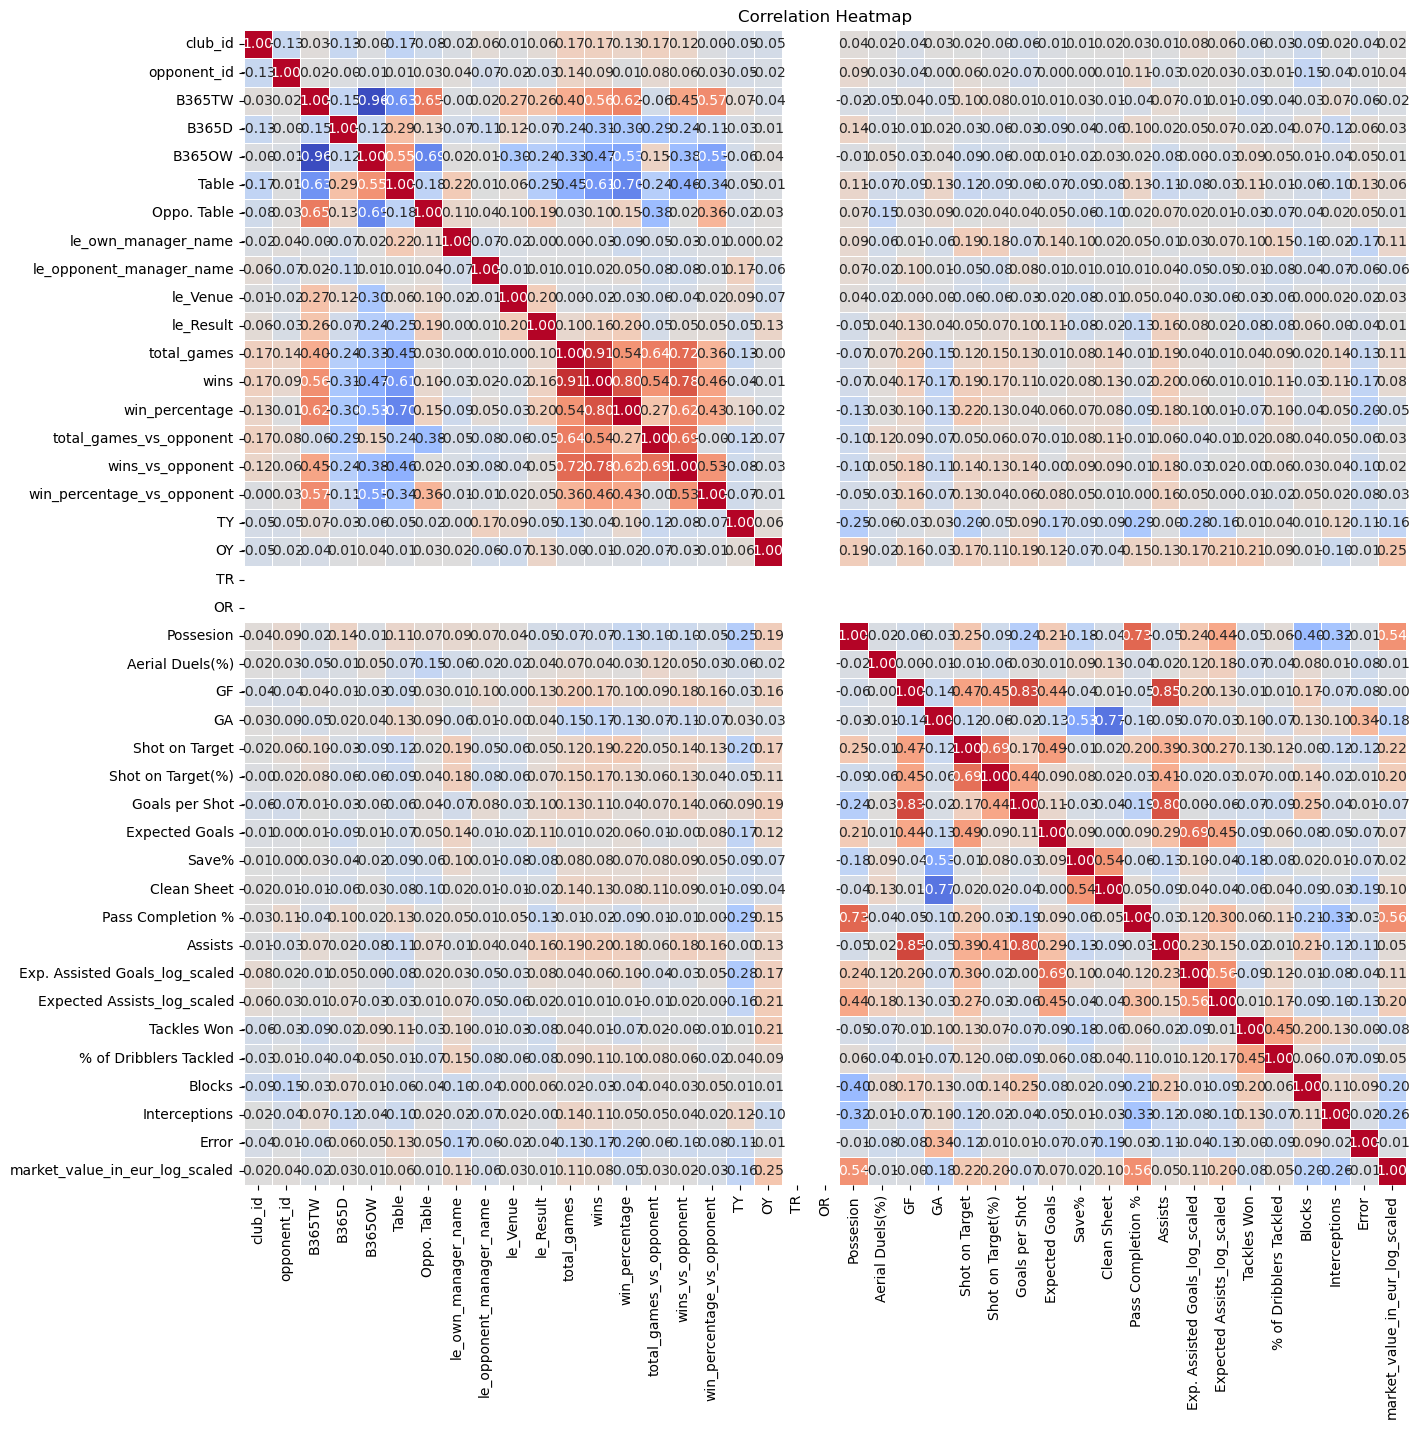

In [31]:
corr = cleaned_final.corr()

# 상관관계 그래프 그리기
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
cleaned_final.columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'le_Result', 'total_games', 'wins', 'win_percentage',
       'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals_log_scaled',
       'Expected Assists_log_scaled', 'Tackles Won', '% of Dribblers Tackled',
       'Blocks', 'Interceptions', 'Error', 'market_value_in_eur_log_scaled'],
      dtype='object')

In [33]:
modeling_features = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'le_Venue', 'TY', 'OY', 'TR', 'OR', 'Possesion',
       'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target', 'Shot on Target(%)',
       'Goals per Shot', 'Expected Goals', 'Save%', 'Clean Sheet',
       'Pass Completion %', 'Assists', 'Exp. Assisted Goals_log_scaled',
       'Expected Assists_log_scaled', 'Tackles Won', '% of Dribblers Tackled', 'Blocks',
       'Interceptions', 'Error','market_value_in_eur_log_scaled',
                    'total_games', 'wins',
       'win_percentage', 'total_games_vs_opponent', 'wins_vs_opponent',
       'win_percentage_vs_opponent']

In [34]:
cleaned_final[modeling_features]

,club_id,opponent_id,B365TW,B365D,B365OW,Table,Oppo. Table,le_own_manager_name,le_opponent_manager_name,le_Venue,...,Blocks,Interceptions,Error,market_value_in_eur_log_scaled,total_games,wins,win_percentage,total_games_vs_opponent,wins_vs_opponent,win_percentage_vs_opponent
1502,11,1010,0.769689,0.788750,-0.911213,0.378157,1.674099,0.376848,0.705677,1.010870,...,-0.391688,-0.674112,0.369394,-0.786351,-1.404911,-0.997300,0.054075,-0.849702,-0.785572,-0.392556
988,11,1003,-1.255094,-1.434613,1.667588,-0.870403,-1.469163,-1.127582,0.201505,-0.989247,...,-0.093444,0.141528,-0.301865,-0.658147,1.370753,0.585525,-0.263599,1.938144,-0.471833,-0.979916
2462,11,1003,-1.089348,-0.084714,1.147996,1.269985,-0.770660,-0.960423,0.369562,-0.989247,...,0.353922,-0.062382,0.033765,-0.714776,-0.783494,-0.766471,-0.667343,-1.159463,-1.099311,-1.315550
2506,11,31,-0.076459,0.788750,-0.083834,-0.156940,-0.072158,-1.712638,-1.142955,1.010870,...,-0.093444,0.141528,0.705024,-0.993745,-0.258741,-0.513659,-0.706828,0.389340,0.155645,-0.084892
2850,11,405,-1.365591,-0.534680,1.364629,1.626716,0.451719,-0.584316,0.999778,-0.989247,...,-0.043736,-0.623135,1.040654,-0.043163,-1.425625,-1.184162,-1.484718,-1.004583,-0.785572,-0.084892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,1237,1148,-1.420839,-1.434613,1.752067,-1.048768,-1.294537,0.418638,0.663663,-0.989247,...,0.254507,-0.113360,-0.301865,0.290452,0.694098,1.014207,1.334620,0.853981,0.469383,-0.084892
1099,1237,873,-0.769723,-0.084714,0.789006,-0.513672,-1.294537,-1.127582,0.411577,1.010870,...,0.552751,-0.164337,0.369394,-0.048173,0.597433,0.090892,-0.350766,2.093024,-0.158094,-0.833988
1075,1237,543,-1.394669,-1.591123,1.810586,-0.870403,-1.469163,-1.127582,-0.344682,-0.989247,...,0.503044,-0.215315,-0.301865,-0.143230,0.721717,0.156843,-0.359457,1.783263,0.469383,-0.436508
1247,1237,379,0.631855,0.622376,-0.711905,-0.156940,0.800971,-1.044003,1.209850,-0.989247,...,0.005971,-0.368247,-0.301865,0.239414,-0.472785,-0.766471,-1.203607,-0.694822,-0.785572,-0.577155


In [35]:
X = cleaned_final[modeling_features]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
cleaned_final['le_Result']

1502    2.0
988     2.0
2462    1.0
2506    0.0
2850    1.0
       ... 
2343    2.0
1099    1.0
1075    1.0
1247    1.0
1193    1.0
Name: le_Result, Length: 202, dtype: float64

In [37]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6829268292682927
F1 Score: 0.6714757067995083


In [38]:
xgb_model = xgb.XGBClassifier(n_estimators=200, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7560975609756098
F1 Score: 0.7328687572590011


In [39]:
estimator = RandomForestClassifier(n_estimators=100, random_state=42) # 학습시킬 모델 지정
selector = RFECV(estimator, step=1, cv = 5) # 한 step에 제거할 featrue 개수 및 cross validation fold 수 지정
selector = selector.fit(X_train, y_train) # feature selection 진행

In [40]:
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True])

In [41]:
selected_columns = X_train.columns[selector.support_]
selected_columns

Index(['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name', 'TY',
       'OY', 'Possesion', 'Aerial Duels(%)', 'GF', 'GA', 'Shot on Target',
       'Shot on Target(%)', 'Goals per Shot', 'Expected Goals', 'Save%',
       'Pass Completion %', 'Exp. Assisted Goals_log_scaled',
       'Expected Assists_log_scaled', 'Tackles Won', '% of Dribblers Tackled',
       'Blocks', 'Interceptions', 'Error', 'market_value_in_eur_log_scaled',
       'total_games', 'wins', 'win_percentage', 'total_games_vs_opponent',
       'win_percentage_vs_opponent'],
      dtype='object')

In [42]:
rfecv_selected_col = ['club_id', 'opponent_id', 'B365TW', 'B365D', 'B365OW', 'Table',
       'Oppo. Table', 'le_own_manager_name', 'le_opponent_manager_name',
       'Possesion', 'Aerial Duels(%)', 'GF', 'Goals per Shot',
       'Expected Goals', 'Save%', 'Pass Completion %',
       'Exp. Assisted Goals_log_scaled', 'Expected Assists_log_scaled',
       'Tackles Won', '% of Dribblers Tackled', 'Blocks', 'Interceptions',
       'market_value_in_eur_log_scaled', 'total_games', 'win_percentage',
       'total_games_vs_opponent', 'win_percentage_vs_opponent']

In [43]:
X = cleaned_final[rfecv_selected_col]
y = cleaned_final['le_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 랜덤포레스트
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6829268292682927
F1 Score: 0.664343786295006


In [45]:
rf_model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model2.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7073170731707317
F1 Score: 0.6858759407119374


In [46]:
rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_model3.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6829268292682927
F1 Score: 0.6663658057943069


In [47]:
rf_model4 = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6829268292682927
F1 Score: 0.6657184576280353


In [48]:
rf_model4 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
rf_model4.fit(X_train, y_train)

y_pred = rf_model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7317073170731707
F1 Score: 0.7075493612078979


In [49]:
rf_model5 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model5.fit(X_train, y_train)

y_pred = rf_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7073170731707317
F1 Score: 0.6858759407119374


In [50]:
rf_model6 = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=42)
rf_model6.fit(X_train, y_train)

y_pred = rf_model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6829268292682927
F1 Score: 0.6663658057943069
